# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

The goal of this project is to perform unsupervised learning techniques to find patterns in the product selling, the customers spending behavior from a wholesale distributor. 

The project involves four main parts: exploratory data analysis and pre-processing, KMeans clustering, hierarchical clustering, and PCA.

# Data Information

The dataset is originally from the [UCI Wholesale customers Data Set](https://archive.ics.uci.edu/dataset/292/wholesale+customers). However, the categorical variables has been encoded to numerical values in the [Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set).

Additional Information:

| Variable            | Type          | Description                                                           | 
|---------------------|---------------|-----------------------------------------------------------------------| 
| Channel             | Nominal       | Customers' Channel - 1: Horeca (Hotel/Restaurant/Café) or 2: Retail channel |
| Region              | Nominal       | Customers' Region - 1: Lisbon, 2: Oporto, or 3: Other Region          |
| Fresh               | Continuous    | Annual spending (m.u.) on fresh products                              | 
| Milk                | Continuous    | Annual spending (m.u.) on milk products                               |
| Grocery             | Continuous    | Annual spending (m.u.) on grocery products                            | 
| Frozen              | Continuous    | Annual spending (m.u.) on frozen products                             | 
| Detergents_Paper    | Continuous    | Annual spending (m.u.) on detergents and paper products               | 
| Delicassen          | Continuous    | Annual spending (m.u.) on delicatessen products                       |

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- **Data Import**: Import the dataset into a statistical software tool such as Python or R.
- **Data Cleaning**: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- **Data Description**: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- **Data Visualization**: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- **Outlier Detection**: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- **Correlation Analysis**: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- **Data Transformation**: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- **Feature Selection**: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

----------

Our goal of the Exploratory Data Analysis is to explore the data, to gain understanding about the provided diabetes datasets by using visualizations, summary statistics, and finally data prepprocessing & transformation to prepare the data for unsupervised learning models (KMeans Clustering, Hierarchical Clustering, PCA).

In [1]:
# Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_theme()

### 1. Data Import

In [2]:
# Load the dataset and save in 'wholesale_df'
wholesale_df = pd.read_csv(r'Wholesale_Data.csv')

# Load the first 5 rows of the dataframe
wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# The dimensions of the dataframe - Number of rows and columns
wholesale_df.shape

(440, 8)

In [4]:
# Print information about the 'diabetes_df' DataFrame
wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### 2. Data Description

In [5]:
# Statistics summary
wholesale_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


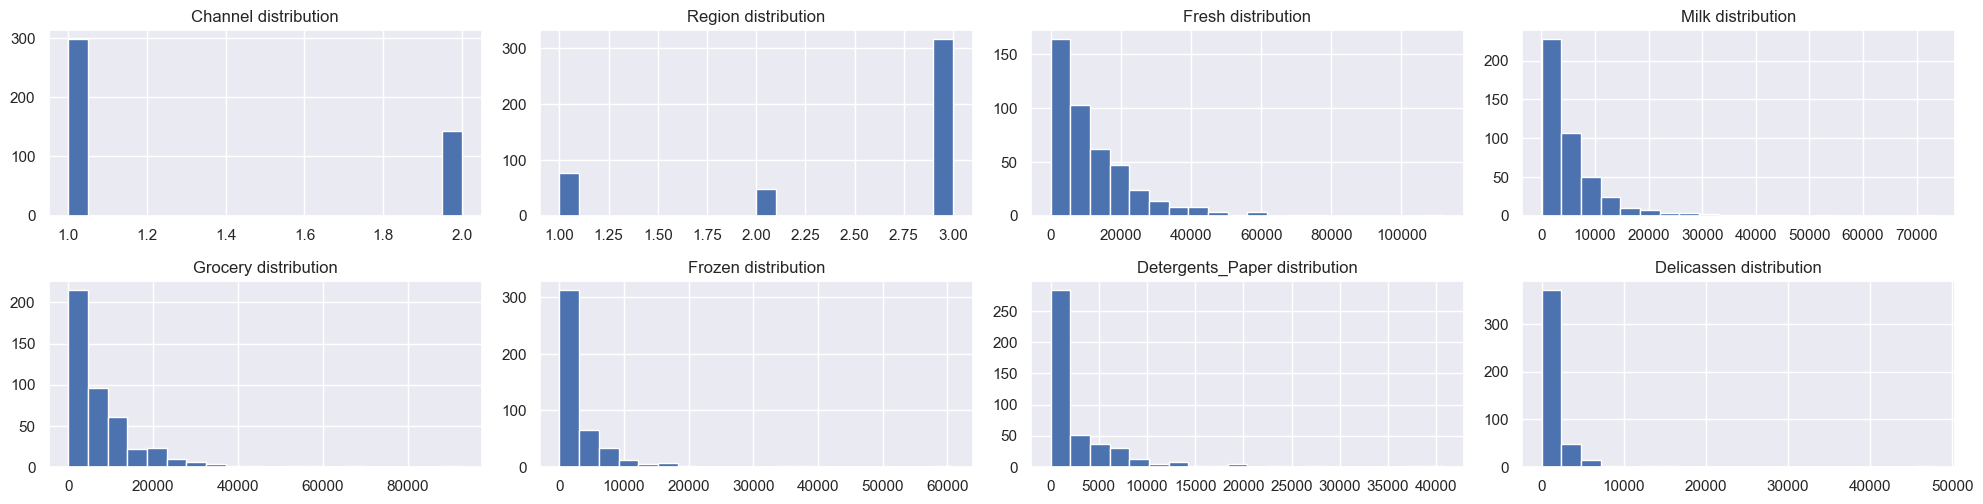

In [6]:
# Plot the histograms for all columns
def draw_histograms(dataframe, features, rows, cols):
    
    fig = plt.figure(figsize=(20,20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax)
        ax.set_title(feature+' distribution')
    
    fig.tight_layout()
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.show()

draw_histograms(wholesale_df, wholesale_df.columns, 8, 4)

Some observations from the distributions of all variables:

* **Channel**: Most of the data is concentrated around the value 1, suggesting a majority of customers belong to the Horeca (Hotel/Restaurant/Café) channel. The Retail channel (thoe with the value 2) is significantly less common than the Horeca wholesale channel. HORECA is an acronym for Hotels, Restaurants and Catering ([Source](https://www.researchgate.net/figure/Customers-and-suppliers-of-wholesalers-Notes-HORECA-stands-for-Hotels-Restaurants-and_fig2_328286663#:~:text=Notes%3A%20HORECA%20stands%20for%20Hotels%2C%20Restaurants%20and%20Catering.)). It refers to the B2B customer base of wholesalers, distributing mass consumption goods to the hospitality industry/hotel and food and beverage industries; as opposed to the Retail client base ([Source](http://www.stridon.hr/en/distribution/horeca-5)).

* **Region**: The majority of the data is centered around the value of 3, which is an aggregation of "Other Region" of that country. It doesn't provide further details about which cities/locations contribute to such a density of wholesale customers in whole. The context of this wholesaler data set seemingly takes place at Portugal with regions like 'Lisnon', 'Oporto'? Portugal has its [two largest cities (Lisbon, Porto)](https://www.statista.com/statistics/372144/largest-cities-in-portugal/) that seems matching ere, but we'll go ahead with only the assumption that 'Lisnon', 'Oporto' might be the largest cities/regions respectively in our studying country. There are smaller concentrations around the values of 1 (Lisnon) and 2 (Oporto), but they have fewer customers compared to the rest of the regions combined.

* **Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen**: The distributions of those numerical columns which indicate the annual spending of those product categories are right skewed, indicating thatthe majority of customers in the dataset have low to moderate spending. There are also a few outliers in such columns which represents a few customers (outliers) who spend a lot.

* The distributions for Channel and Region suggest categoric nature of the data where customers are primarily grouped in one channel or region, with fewer in the other categories.

### 3. Data Cleaning

In [7]:
# There's no missing values
wholesale_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
# There's no duplicated rows
wholesale_df.duplicated().sum()

0

### 4. Data Visualization & Exporation

#### * Are there more Horeca or more Retail customers for this wholesaler?

The count of customers per each channel type: 
 1    298
2    142
Name: Channel, dtype: int64

The percentage of customers per each channel type: 
 1    67.727273
2    32.272727
Name: Channel, dtype: float64


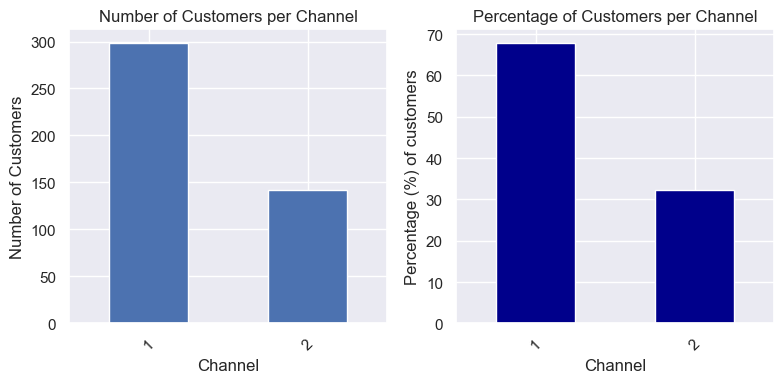

In [9]:
# Calculate actual numbers of customers per each channel type
channel_counts = wholesale_df['Channel'].value_counts().sort_values(ascending=False)
print('The count of customers per each channel type: \n', channel_counts)

# Calculate percentages of customers per each channel type
channel_perc = wholesale_df['Channel'].value_counts(normalize=True).sort_values(ascending=False) * 100
print('\nThe percentage of customers per each channel type: \n', channel_perc)

# Plot actual numbers of customers per each channel type
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
channel_counts.plot(kind='bar')
plt.title('Number of Customers per Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Plot percentages of customers per each channel type
plt.subplot(1, 2, 2)
channel_perc.plot(kind='bar', color='darkblue')
plt.title('Percentage of Customers per Channel')
plt.xlabel('Channel')
plt.ylabel('Percentage (%) of customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Almost 68% of the customers of this wholesaler are from Horeca places (hotels, restaurants, cafes and shops), whereas only 32% are Retail customers.

#### * How are the customers of this wholesaler distributed across the regions?

The count of customers per each region: 
 1    298
2    142
Name: Channel, dtype: int64

The percentage of customers per each region: 
 3    71.818182
1    17.500000
2    10.681818
Name: Region, dtype: float64


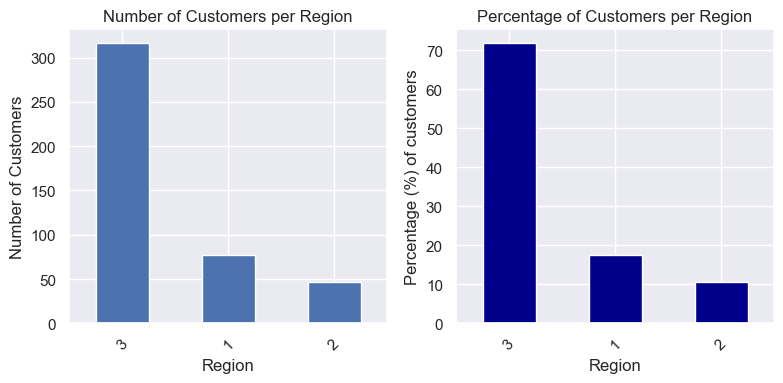

In [10]:
# Calculate actual numbers of customers per each region
region_counts = wholesale_df['Region'].value_counts().sort_values(ascending=False)
print('The count of customers per each region: \n', channel_counts)

# Calculate percentages of customers per each region
region_perc = wholesale_df['Region'].value_counts(normalize=True).sort_values(ascending=False) * 100
print('\nThe percentage of customers per each region: \n', region_perc)

# Plot actual numbers of customers per each region
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
region_counts.plot(kind='bar')
plt.title('Number of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Plot percentages of customers per each channel type
plt.subplot(1, 2, 2)
region_perc.plot(kind='bar', color='darkblue')
plt.title('Percentage of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Percentage (%) of customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

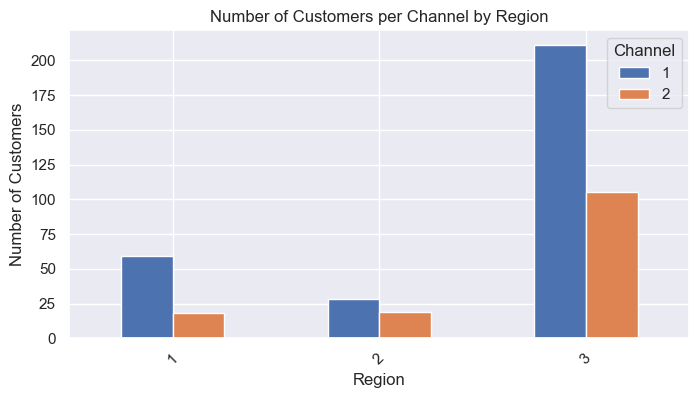

In [11]:
# Group by 'Channel' and 'Region' and count the number of customers
channel_region_counts = wholesale_df.groupby(['Channel', 'Region']).size().unstack()

# Plot the counts of customers per 'Channel' by 'Region'
channel_region_counts.T.plot(kind='bar', figsize=(8, 4))
plt.title('Number of Customers per Channel by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()

The majority of customers, estimated at 72% the customer base of this wholesaler are densely located in Region 3 - 'Other Region' for both Horeca and Retail custommers. There are much more Horeca customers in Lisnon than in Operto.

#### * Are there any difefrences between the spending patterns from Horeca or more Retail customers across the product categories?

In [12]:
# Separate the Horeca customer channel in a variable for data exploration
horeca_channel = wholesale_df.loc[wholesale_df['Channel'] == 1].reset_index(drop=True)

# Calculate a new column 'Total_Spend' across all product categories
horeca_channel['Total_Spend'] = horeca_channel[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

horeca_channel

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend
0,1,3,13265,1196,4221,6404,507,1788,27381
1,1,3,5963,3648,6192,425,1716,750,18694
2,1,3,10253,1114,3821,397,964,412,16961
3,1,3,5876,6157,2933,839,370,4478,20653
4,1,3,7780,2495,9464,669,2518,501,23427
...,...,...,...,...,...,...,...,...,...
293,1,3,16731,3922,7994,688,2371,838,32544
294,1,3,29703,12051,16027,13135,182,2204,73302
295,1,3,39228,1431,764,4510,93,2346,48372
296,1,3,10290,1981,2232,1038,168,2125,17834


In [13]:
# Separate the Retail customer channel in a variable for data exploration
retail_channel = wholesale_df.loc[wholesale_df['Channel'] == 2].reset_index(drop=True)

# Calculate a new column 'Total_Spend' across all product categories
retail_channel['Total_Spend'] = retail_channel[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

retail_channel

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,2,3,22615,5410,7198,3915,1777,5185,46100
4,2,3,9413,8259,5126,666,1795,1451,26710
...,...,...,...,...,...,...,...,...,...
137,2,3,660,8494,18622,133,6740,776,35425
138,2,3,17063,4847,9053,1031,3415,1784,37193
139,2,3,17565,3686,4657,1059,1803,668,29438
140,2,3,16980,2884,12232,874,3213,249,36432


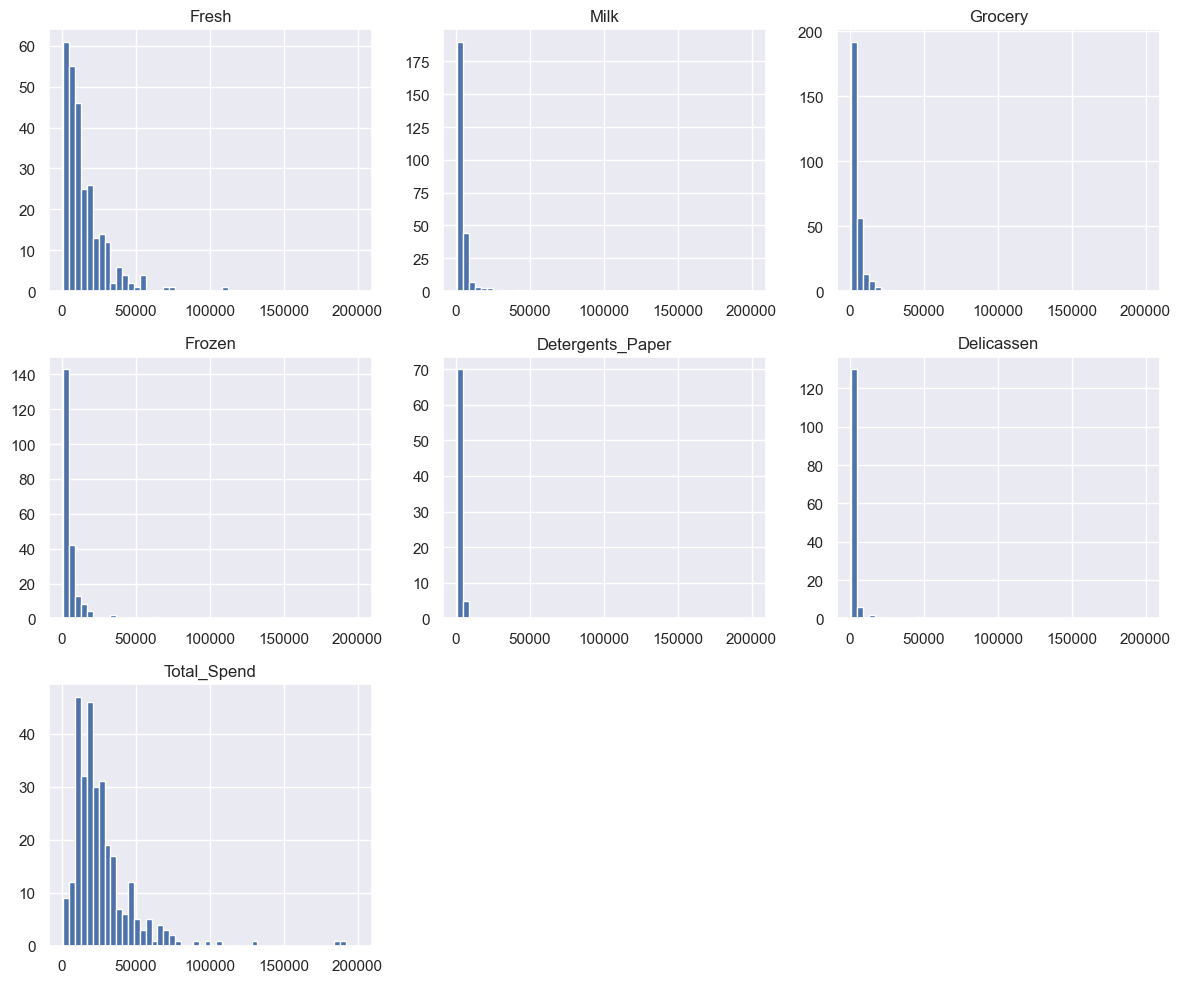

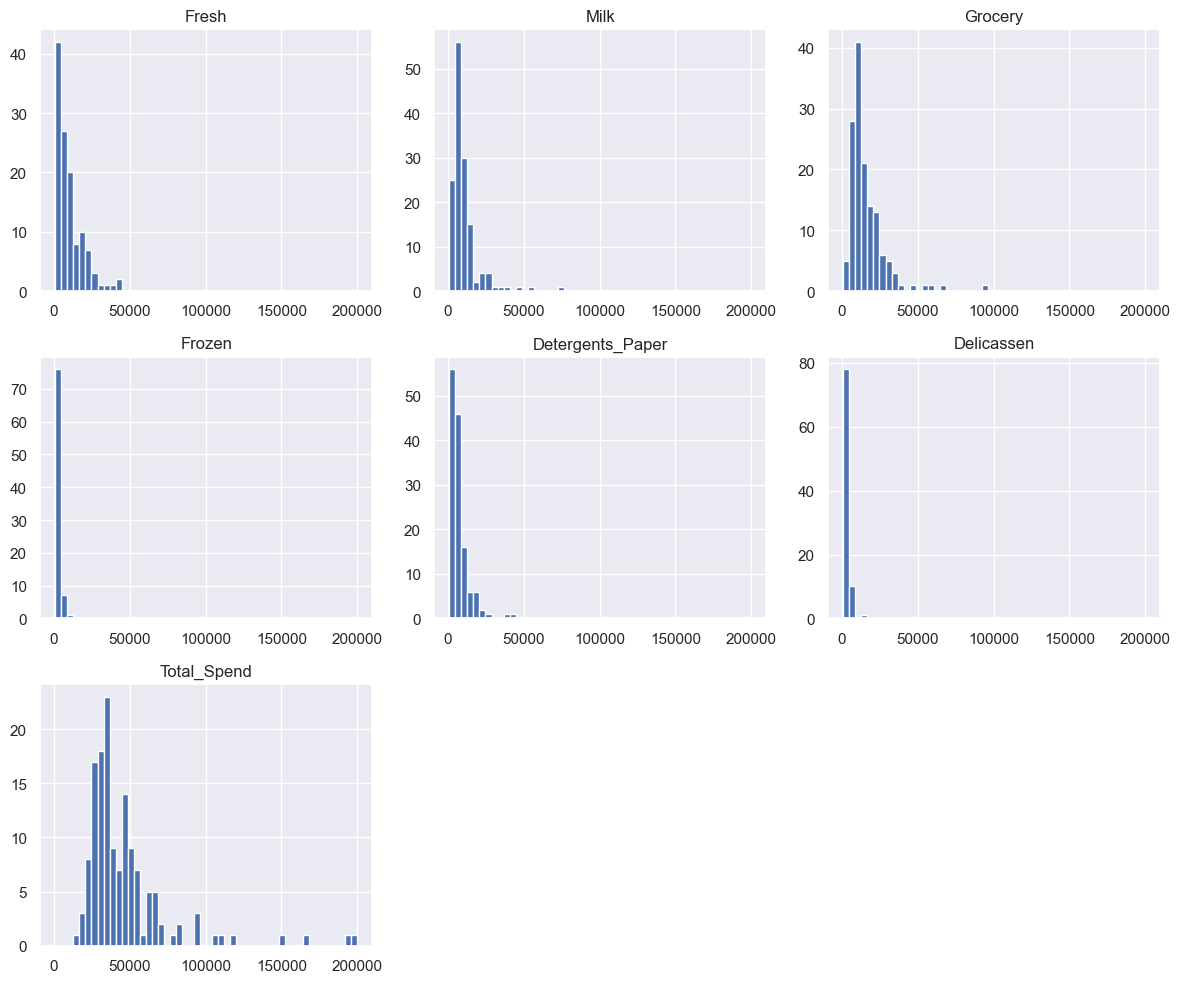

In [14]:
# Determine global min and max for each shared column of the 'horeca_channel' and 'retail_channel' dataframes to compare the spending behaviors
# Except for categorical columns: 'Channel', 'Region'
cols = horeca_channel.drop(columns=['Channel', 'Region']).columns
xlims = {}

for feature in cols:
    global_min = np.min([horeca_channel[feature].min(), retail_channel[feature].min()])
    global_max = np.max([horeca_channel[feature].max(), retail_channel[feature].max()])
    xlims[feature] = (global_min, global_max)

# Plot horeca_channel annual spending across product categories with global axis limits
horeca_channel.drop(columns=['Channel', 'Region']).hist(figsize=(12, 10), bins=50, range=xlims[feature])

plt.tight_layout()
plt.show()

# Plot retail_channel pending across product categories with global axis limits
retail_channel.drop(columns=['Channel', 'Region']).hist(figsize=(12, 10), bins=50, range=xlims[feature])

plt.tight_layout()
plt.show()


In [15]:
horeca_channel['Total_Spend'].describe()

count       298.000000
mean      26844.191275
std       22164.839073
min         904.000000
25%       13859.250000
50%       21254.500000
75%       32113.750000
max      190169.000000
Name: Total_Spend, dtype: float64

In [16]:
retail_channel['Total_Spend'].describe()

count       142.000000
mean      46619.232394
std       29346.866491
min       14993.000000
25%       30147.250000
50%       37139.000000
75%       51650.500000
max      199891.000000
Name: Total_Spend, dtype: float64

Based on the histograms from both the horeca and retail channels, we have some observations:

* Although nearly 68% of customers are from Horeca, their average annual spend for all categories is just $26,844 (assuming the spend is in dollars). Retail customers accounts for only 32% of the total number of customers, yet their average yearly spend is $46,619.
* Retail customers tend to spend more on Milk, Groceries and Detergents_paper compared to Horeca customers.
* Both channels see similar overall spending patterns for the rest of the categories, despite Horeca customers slightly spend more on food-related categories such as: Fresh produce and Frozen products.
* The repeated pattern of extreme outliers who tend to spend more than normal customers.

### 5. Outlier Dectection & Handling

As we found out above that there are cases where customers' spendings are extremely out of the norm and driving our distributions highly skewed to the right. They exist in small numbers and valid, yet their spendings are many times more than normal. We'll need to dectect and deal with those outlier instances because they may severely impact our models at a latter point.

In [17]:
# Select only columns with numeric data types
numeric_cols = wholesale_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].columns.tolist()
print(numeric_cols)

# Select only columns with categorical data types
cat_cols = wholesale_df[['Channel', 'Region']].columns.tolist()
print(cat_cols)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
['Channel', 'Region']


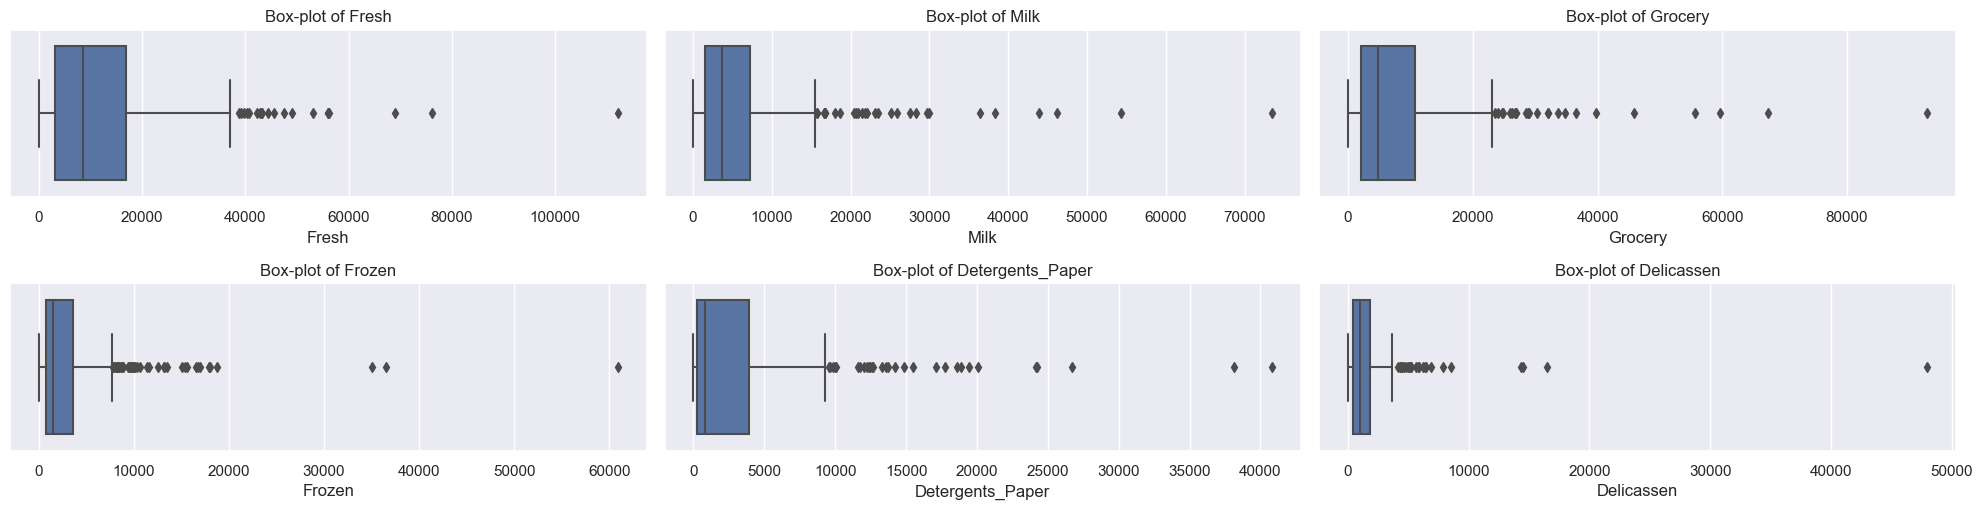

In [18]:
# Plot the boxplots for numeric columns to dectect outliers
def draw_boxplot(dataframe, features, rows, cols):
    
    fig = plt.figure(figsize=(20,20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        sns.boxplot(data=dataframe, x=dataframe[feature])
        ax.set_title('Box-plot of '+ feature)
    
    fig.tight_layout()
    plt.show()

# Exclude the categorical 'Channel', 'Region' columns from the columns list
draw_boxplot(wholesale_df, wholesale_df[numeric_cols], 8, 3)

In [19]:
# Check the current dimension of wholesale_df before treating the outliers
wholesale_df.shape

(440, 8)

In [20]:
# Function to remove outliers out of the Z-score range
def remove_outliers(dataframe, col):

    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]

# Applying the function on each column, excluding the categorical 'Channel', 'Region' columns
for col in wholesale_df[numeric_cols].columns:
    wholesale_df = remove_outliers(wholesale_df, col)

# View 'wholesale_df' after removing the outliers that are out of the Z-score range
wholesale_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


In [21]:
# Drop duplicated rows, if any at this point
wholesale_df.drop_duplicates(inplace=True)

In [22]:
# Check again the current shape of wholesale_df after treating the outliers
wholesale_df.shape

(318, 8)

### 6. Correlation Analysis

Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not by using the correlation matrix.

In [23]:
# Use the corr() method to find the pairwise correlation of all columns
wholesale_df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.145904,-0.083583,0.616291,0.708853,-0.180617,0.772343,0.202762
Region,0.145904,1.000000,-0.006608,0.099850,0.102724,-0.075077,0.099916,0.092540
Fresh,-0.083583,-0.006608,1.000000,-0.056104,-0.064819,0.200101,-0.202086,0.211049
Milk,0.616291,0.099850,-0.056104,1.000000,0.736872,-0.165518,0.685531,0.290687
Grocery,0.708853,0.102724,-0.064819,0.736872,1.000000,-0.201720,0.845943,0.272322
Frozen,-0.180617,-0.075077,0.200101,-0.165518,-0.201720,1.000000,-0.185918,0.075176
Detergents_Paper,0.772343,0.099916,-0.202086,0.685531,0.845943,-0.185918,1.000000,0.163153
Delicassen,0.202762,0.092540,0.211049,0.290687,0.272322,0.075176,0.163153,1.000000


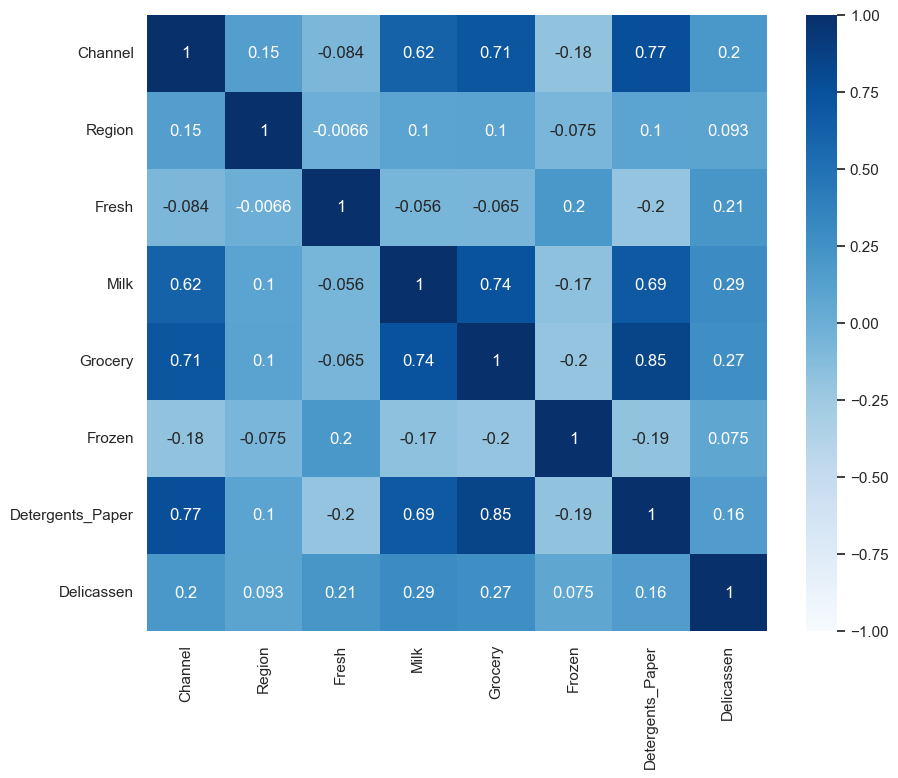

In [24]:
# Use a correlation matrix heatmap to check the relationship between the different variables
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(wholesale_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.show()

Some significant correlation observations:

* **Channel and Grocery**: The correlation is 0.71, suggesting a strong positive linear relationship between 'Channel' and 'Grocery'.

* **Channel and Detergents_Paper**: A correlation of 0.77 indicates an even stronger positive linear relationship between 'Channel' and 'Detergents_Paper', compared to Grocery.

* **Channel and Milk**: A correlation of 0.62 indicates a moderate positive linear relationship between 'Channel' and 'Milk'.

* **Milk and Grocery**: The correlation is 0.74, indicating a strong positive relationship.

* **Milk and Detergents_Paper**: The correlation is 0.69, indicating a moderately strong positive relationship.

* **Grocery and Detergents_Paper**: With a correlation of 0.85, this is one of the strongest positive linear relationship.

### 7. Feature Selection:

Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [25]:
# Copy 'wholesale_df' into X features set
X = wholesale_df.copy()
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


To prevent multicollinearity in the machine learning models, it's best to remove highly correlated pairs out of the model to improve performance. 

Since 'Channel' exhibits a moderate to strong linear correlation relationship with a couple of other features ('Detergents_Paper, Grocery, Milk'), it is a candidate to be removed from our feature lists. Also, this column is a less interpretable categorical variable with just 2 unique values (1 for Horeca channel, 2 for Retail channel) which presents a lesser variance.

Let's find out the number of unique values among 'Milk, Grocery, Detergents_Paper' to consider which column to drop based on the lesser variance ground.

In [26]:
X.Milk.nunique()

303

In [27]:
X.Grocery.nunique()

313

In [28]:
X.Detergents_Paper.nunique()

306

The number of unique values among those 3 variables aren't too far off. Let's come back to the ultimate "bottom line" our wholesaling dataset, we would want to increase the customers' spending much as using machine learning techniques to explore undiscovered data patterns about the customers. All these numeric features share the same measure in the form of "annual spending in monetary units. 

Thus, if we have to choose an optimal method to get rid of one feature among the 'Milk and Grocery', 'Milk and Detergents_Paper' and 'Grocery and Detergents_Paper' pairs, it's probably best to remove 'Detergents_Paper' due to a low spend.

Between 'Milk and Grocery', usually milk is listed as a grocery item. However, we decide to keep two sets of features (one with 'Milk; and one without) to compare performance Milk's considerable volume of customers' spending.

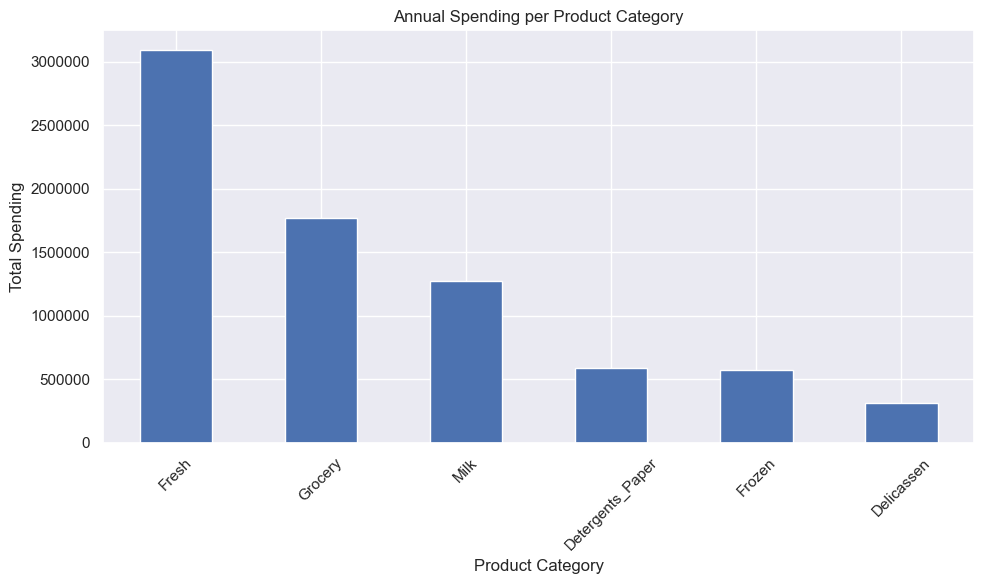

In [29]:
# Calculate the sum of annual spending per each product category
category_sums = X[numeric_cols].sum().sort_values(ascending=False)

# Plot the sum of annual spending per each product category
plt.figure(figsize=(10, 5))
category_sums.plot(kind='bar')
plt.title('Annual Spending per Product Category')
plt.ylabel('Total Spending')
plt.xlabel('Product Category')

# Reset y-axis formatter to ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')  # This will remove scientific notation
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Seperate a 'X_no_milk' features set without the 'Channel' but have 'Milk' column
X_milk = X.drop(columns=['Channel'])
X_milk

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
3,3,13265,1196,4221,6404,507,1788
5,3,9413,8259,5126,666,1795,1451
6,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...
432,3,21117,1162,4754,269,1328,395
433,3,1982,3218,1493,1541,356,1449
434,3,16731,3922,7994,688,2371,838
438,3,10290,1981,2232,1038,168,2125


In [31]:
# Seperate a 'X_selected' features set without the 'Channel' and 'Milk' column
X_selected = X.drop(columns=['Channel', 'Milk'])
X_selected

,Region,Fresh,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,7561,214,2674,1338
1,3,7057,9568,1762,3293,1776
3,3,13265,4221,6404,507,1788
5,3,9413,5126,666,1795,1451
6,3,12126,6975,480,3140,545
...,...,...,...,...,...,...
432,3,21117,4754,269,1328,395
433,3,1982,1493,1541,356,1449
434,3,16731,7994,688,2371,838
438,3,10290,2232,1038,168,2125


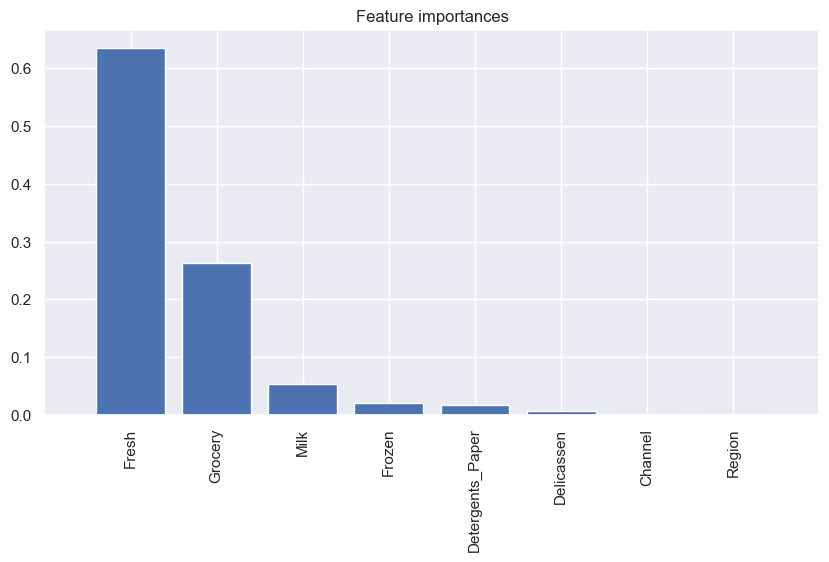

In [32]:
#

# Fit RandomForest
model = RandomForestRegressor(n_estimators=100)
model.fit(X, X)

# Get feature importances
importances = model.feature_importances_

# Plot feature importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


### 8. Data Transformation:

In [ ]:
X

Spit the data into train and test sets:

* With the 'X_no_milk' features set without the 'Channel' but have 'Milk' column:

In [33]:
# Split the 'X_milk' data into training and test set with 70% training, 30% testing as it's a smaller dataset of around 300 rows
X_milk_train, X_milk_test = train_test_split(X_milk, test_size=0.3, random_state=42)

In [34]:
X_milk_train.shape

(222, 7)

In [ ]:
X_milk_train.shape

(222, 7)

* With the 'X_selected' features set without the 'Channel' and 'Milk' column:

In [36]:
# Split the 'X_selected' data into training and test set with 70% training, 30% testing as it's a smaller dataset of around 300 rows
X_selected_train, X_selected_test = train_test_split(X_selected, test_size=0.3, random_state=42)

In [37]:
X_selected_train.shape

(222, 6)

In [38]:
X_selected_test.shape

(96, 6)

Transform the features by using sklearn StandardScaler to make them comparable across different scales.

* With the 'X_no_milk' features set without the 'Channel' but have 'Milk' column:

In [39]:
# Use StandardScaler from sklearn to scale the data as some features are highly skewed to the right and widely spread from the mean

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the X_train data
X_milk_train_scaled = scaler.fit_transform(X_milk_train)

#
X_milk_train_df = pd.DataFrame(X_milk_train_scaled, columns=X_milk_train.columns)

# Apply the scaling used in the X_train data to the X_test data
X_milk_test = scaler.transform(X_milk_test)

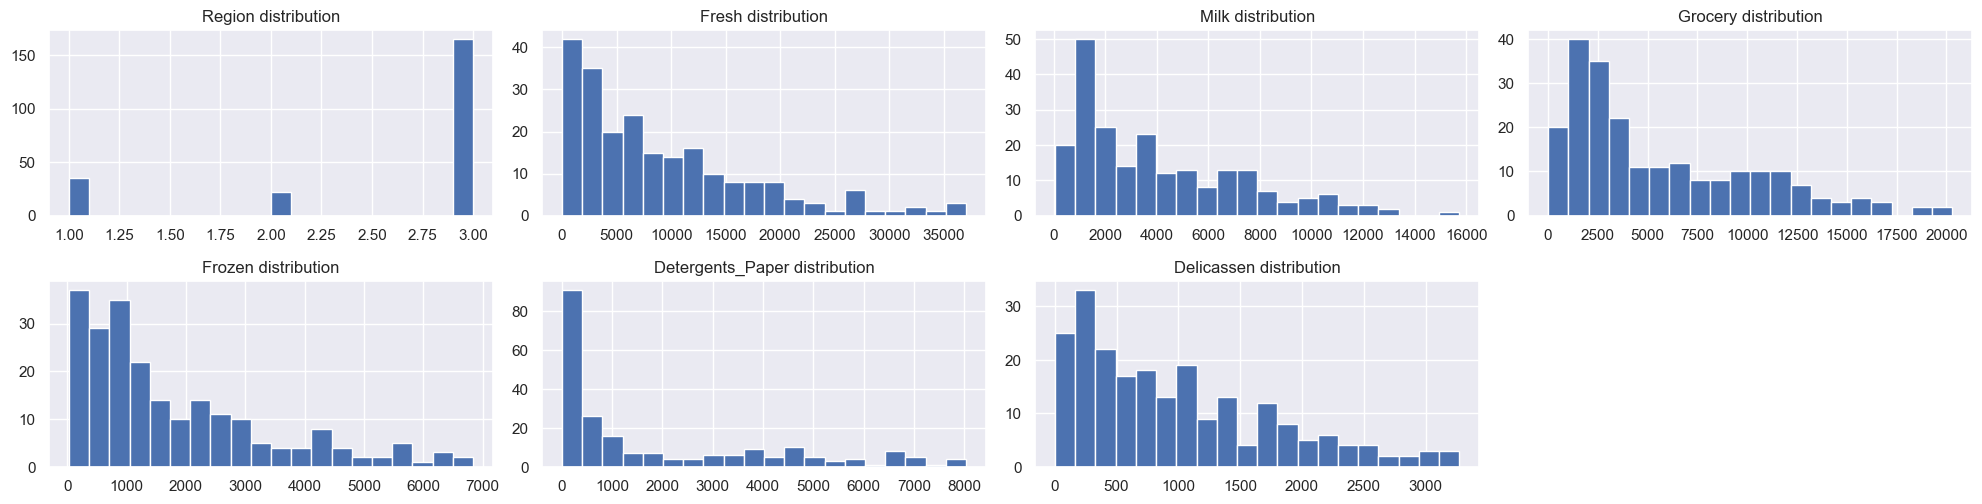

In [41]:
# 

# draw_histograms(X_milk_train, X_milk_train.columns, 8, 4)

* With the 'X_selected' features set without the 'Channel' and 'Milk' column:

In [ ]:
# Use StandardScaler from sklearn to scale the data as some features are highly skewed to the right and widely spread from the mean

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the X_train data
X_selected_train_scaled = scaler.fit_transform(X_selected_train)

#
X_selected_train_df = pd.DataFrame(X_selected_train_scaled, columns=X_selected_train.columns)


# Apply the scaling used in the X_train data to the X_test data
X_selected_test = scaler.transform(X_selected_test)

In [ ]:
# 

# draw_histograms(X_selected_train, X_selected_train.columns, 8, 4)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.